In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt

### 01 plt.imshow 可视化2D的数组
- plt.imshow(Z, cmap = cm.binary, interpolation = 'nearest', extent=(xmin, xmax, ymin, ymax))
参数：
  - 参数1 array-2维数组
  - 参数2 cmap调色板，cm.binary二值调色板
  - 参数3 interpolation 插补算法
  - 参数4 extent 控制图像边界，2维数组的最大值和最小值


In [ ]:
def iter_count(C, max_iter):
    X = C    
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X ** 2 + C
    return max_iter
N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5

X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))
for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)
Z.shape

In [7]:
Z

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

因为Z是由（0， 1）组成，调色板用的是cm.binary二元调色板，所以是黑白图

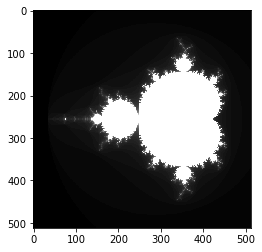

In [6]:
plt.imshow(Z, cmap = cm.gray)
plt.show()

添加了extent参数之后，坐标被控制了extend的范围，Z的值被映射到这个范围里

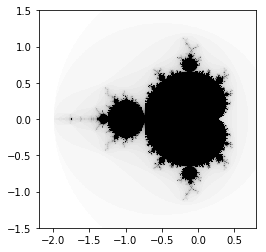

In [9]:
plt.imshow(Z, cmap = cm.binary, extent=(xmin, xmax, ymin, ymax))
plt.show()

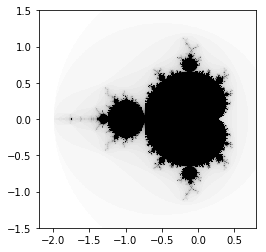

In [11]:
plt.imshow(Z, cmap = cm.binary, interpolation = 'nearest', extent=(xmin, xmax, ymin, ymax))
plt.show()

### 02 添加色卡条plt.colorbar() ,set_label()为色卡条添加标签


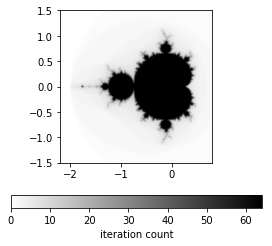

In [12]:
plt.imshow(Z, cmap = cm.binary, interpolation = 'bicubic', extent=(xmin, xmax, ymin, ymax))

cb = plt.colorbar(orientation='horizontal', shrink=.75)
cb.set_label('iteration count')
plt.show()

### 03 非标注的2D数据

In [15]:
from matplotlib.mlab import griddata
from numpy.random import uniform, seed 

def iter_count(C, max_iter):
    X = C        
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X ** 2 + C
    return max_iter

max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
sample_count = 2 ** 12
A = uniform(xmin, xmax, sample_count)
B = uniform(ymin, ymax, sample_count)
C = [iter_count(complex(a, b), max_iter) for a, b in zip(A, B)] 
N = 512
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
print A
print B
print C
print X
print Y

[-1.51097342 -2.12430536 -0.02716004 ..., -1.42052668 -0.49674106
  0.77781595]
[-0.03041035  0.29087645 -0.37765861 ..., -0.74934328  1.04616639
 -0.51055667]
[8, 0, 64, 10, 64, 4, 64, 64, 2, 0, 2, 0, 2, 2, 0, 0, 32, 64, 25, 64, 1, 0, 64, 3, 0, 4, 2, 1, 0, 3, 3, 3, 4, 0, 1, 64, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 3, 3, 0, 3, 0, 4, 1, 2, 6, 3, 1, 5, 3, 0, 2, 0, 2, 64, 64, 3, 2, 1, 5, 1, 0, 6, 0, 3, 2, 2, 2, 64, 1, 5, 4, 2, 1, 2, 0, 4, 2, 1, 2, 2, 0, 64, 1, 2, 5, 3, 2, 1, 4, 0, 4, 3, 1, 4, 1, 64, 0, 3, 2, 2, 64, 5, 3, 3, 18, 1, 2, 1, 8, 64, 1, 1, 1, 0, 2, 21, 2, 2, 1, 0, 64, 2, 0, 64, 64, 0, 3, 3, 2, 1, 2, 5, 2, 3, 2, 1, 5, 0, 5, 1, 4, 3, 0, 2, 64, 3, 2, 0, 4, 1, 64, 2, 2, 5, 2, 64, 4, 4, 2, 2, 0, 3, 3, 3, 64, 2, 1, 2, 4, 64, 3, 7, 2, 1, 1, 1, 1, 1, 5, 4, 1, 2, 2, 2, 64, 1, 1, 1, 8, 2, 2, 14, 1, 3, 0, 64, 1, 64, 11, 1, 1, 64, 3, 2, 0, 4, 2, 2, 2, 0, 64, 2, 7, 0, 64, 2, 17, 2, 2, 4, 0, 3, 4, 2, 0, 1, 64, 0, 2, 6, 8, 6, 2, 2, 1, 1, 9, 5, 1, 0, 2, 0, 0, 64, 1, 3, 5, 64, 2, 6, 2, 64, 6, 0, 2, 64,

In [17]:
Z = griddata(A, B, C, X, Y, interp = 'linear')
Z

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

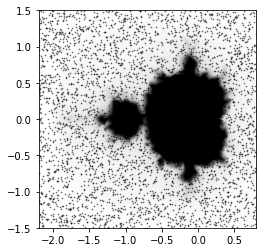

In [16]:

plt.scatter(A, B, color = (0., 0., 0., .5), s = .5)
plt.imshow(Z, cmap = cm.binary, interpolation = 'bicubic', extent=(xmin, xmax, ymin, ymax))
plt.show()

### 04 波纹图
- plt.pcolormesh()
- meshgrid()的用法

　　x=-3:1:3;y=-2:1:2; 
  
　　[X,Y]= meshgrid(x,y); 
  
　1、 这里meshigrid（x，y）的作用是产生一个以向量x为行，向量y为列的矩阵，而x是从-3开始到3，每间隔1记下一个数据，并把这些数据集成矩阵X；同理y则是从-2到2，每间隔1记下一个数据，并集成矩阵Y
  例题中meshgrid(-3:1:3,-2:1:2);因为-3:1:3产生的是含有7个数字的行向量；-2:1:2产生的是含有5个数字的行向量。所以该命令的结果是产生5*7的矩阵（X,Y都是5*7的矩阵；其中X是由第一个含7个元素的行向量产生，Y是由第二个行向量产生）
  
  
   2、 生成绘制3-D图形所需的网格数据。在计算机中进行绘图操作时，往往需要一些采样点，然后根据这些采样点来绘制出整个图形。在进行3-D绘图操作时，涉及到x、y、z三组数据，而x、y这两组数据可以看做是在Oxy平面内对坐标进行采样得到的坐标对(x,y)。
 
   语法：
   
　　[X,Y] = meshgrid(x,y)
  
　　上面的描述，我们可以知道，meshgrid返回的两个矩阵X、Y必定是行数、列数相等的，且X、Y的行数都等于输入参数y中元素的总个数，X、Y的列数都等于输入参数x中元素总个数（这个结论可以通过查看meshgrid的源代码得到，可以通过示例程序得到验证）。
  
　　[X,Y]=meshgrid(x)与[X,Y]=meshgrid(x,x)是等同的
  
　　[X,Y,Z]=meshgrid(x,y,z)生成三维数组，可用来计算三变量的函数和绘制三维立体图
  
  相关函数： plot3、mesh、surf、automesh、ndgrid
  
- plt.pcolormesh()画方程

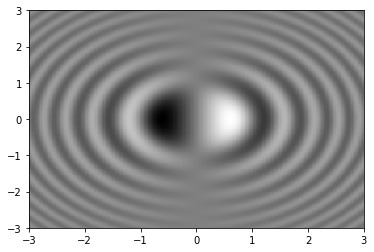

In [19]:
n = 256
x = np.linspace(-3., 3., n)
y = np.linspace(-3., 3., n)
X, Y = np.meshgrid(x, y)
Z = X * np.sinc(X ** 2 + Y ** 2)
plt.pcolormesh(X, Y, Z, cmap = cm.gray)
plt.show()

### 05 等高线

In [22]:

N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -0.32, -0.22, 0.8, 0.9
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))

for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)
        
Z.shape
Z


array([[  7.,   7.,   7., ...,  64.,  64.,  64.],
       [  7.,   7.,   7., ...,  64.,  64.,  64.],
       [  7.,   7.,   7., ...,  64.,  64.,  64.],
       ..., 
       [  5.,   5.,   5., ...,   8.,   8.,   8.],
       [  5.,   5.,   5., ...,   8.,   8.,   8.],
       [  5.,   5.,   5., ...,   8.,   8.,   8.]])

 ### 06 plt.contour()添加轮廓

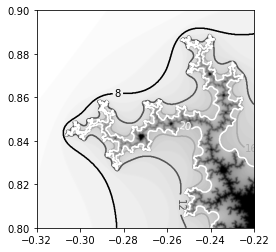

In [23]:
plt.imshow(Z, cmap = cm.binary, interpolation = 'bicubic', origin = 'lower', extent=(xmin, xmax, ymin, ymax))
levels = [8, 12, 16, 20]
ct = plt.contour(X, Y, Z, levels, cmap = cm.gray)
plt.clabel(ct, fmt='%d')
plt.show()

In [ ]:
cm.gray()将图型灰度化， 


In [27]:
def iter_count(C, max_iter):
    X = C
    for n in range(max_iter):
        if abs(X) > 2.:
            return n
        X = X ** 2 + C
    return max_iter

N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -0.32, -0.22, 0.8, 0.9
X = np.linspace(xmin, xmax, N)
Y = np.linspace(ymin, ymax, N)
Z = np.empty((N, N))
for i, y in enumerate(Y):
    for j, x in enumerate(X):
        Z[i, j] = iter_count(complex(x, y), max_iter)

levels = [0, 8, 12, 16, 20, 24, 32]


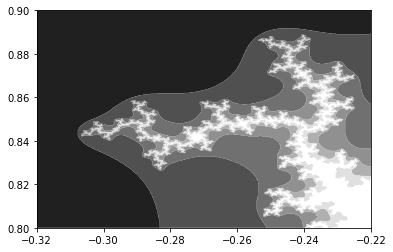

In [25]:
plt.contourf(X, Y, Z, levels, cmap = cm.gray, antialiased = True)
plt.show()

### 07 向量空间

In [30]:
import sympy
from sympy.abc import x, y 
def cylinder_stream_function(U = 1, R = 1):
    r = sympy.sqrt(x ** 2 + y ** 2)
    theta = sympy.atan2(y, x)
    return U * (r - R ** 2 / r) * sympy.sin(theta)
def velocity_field(psi):
    u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
    v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
    return u, v
U_func, V_func = velocity_field(cylinder_stream_function() )
xmin, xmax, ymin, ymax = -2.5, 2.5, -2.5, 2.5
Y, X = np.ogrid[ymin:ymax:16j, xmin:xmax:16j]
U, V = U_func(X, Y), V_func(X, Y)
M = (X ** 2 + Y ** 2) < 1.
U = np.ma.masked_array(U, mask = M)
V = np.ma.masked_array(V, mask = M)


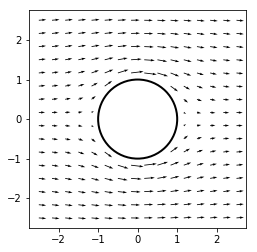

In [32]:
import matplotlib.patches as patches 

shape = patches.Circle((0, 0), radius = 1., lw = 2., fc = 'w', ec = 'k', zorder = 0)
plt.gca().add_patch(shape)
plt.quiver(X, Y, U, V, zorder = 1)
plt.axes().set_aspect('equal')
plt.show()

In [33]:
psi = cylinder_stream_function()
U_func, V_func = velocity_field(psi)
xmin, xmax, ymin, ymax = -3, 3, -3, 3
Y, X = np.ogrid[ymin:ymax:128j, xmin:xmax:128j]
U, V = U_func(X, Y), V_func(X, Y)
M = (X ** 2 + Y ** 2) < 1.
U = np.ma.masked_array(U, mask = M)
V = np.ma.masked_array(V, mask = M)
shape = patches.Circle((0, 0), radius = 1., lw = 2., fc = 'w', ec = 'k', zorder = 0)

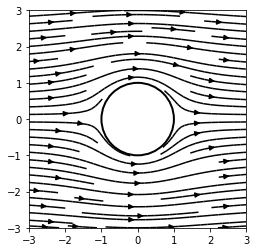

In [34]:
plt.gca().add_patch(shape)
plt.streamplot(X, Y, U, V, color = 'k')
plt.axes().set_aspect('equal')
plt.show()